In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_parquet("output/clean_data.pq")
df = df[(df.prescription_use == "Low")]  # Only handle low prescription use

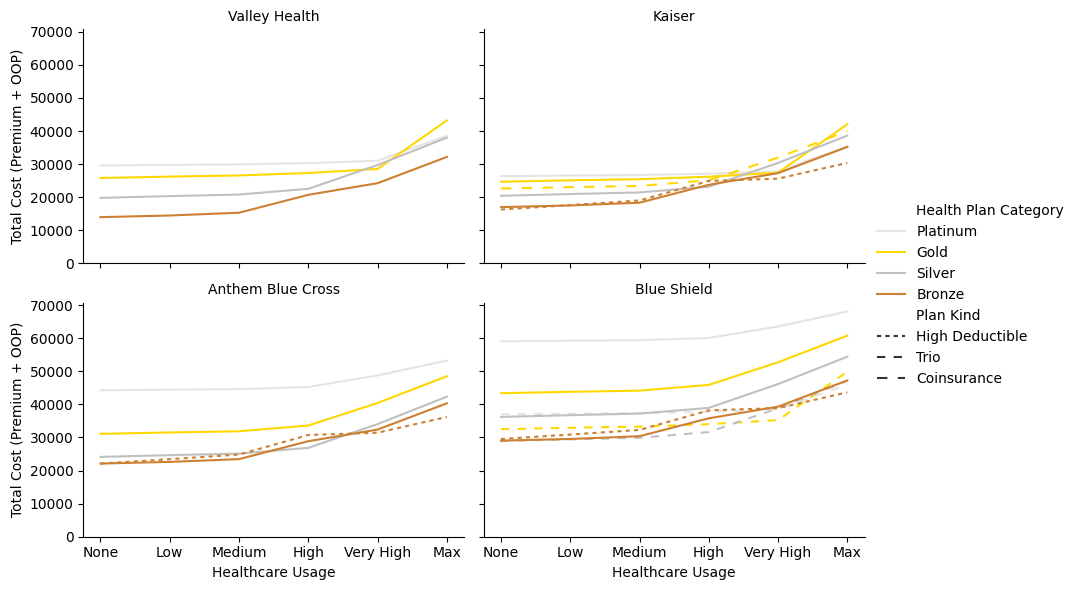

In [3]:
palette = {"Platinum": "#E5E4E2", "Gold": "gold", "Silver": "silver", "Bronze": "#CD7F32"}
dashes = {"High Deductible": (2,2), "Trio": (4, 4), "Coinsurance": (5, 5), "": ""}

g = sns.FacetGrid(df, col="insurance", aspect=1.5, col_wrap=2)
g.map_dataframe(
    sns.lineplot, 
    x="Healthcare Usage", 
    y="Total Cost (Premium + OOP)",
    hue="Health Plan Category",
    palette=palette,
    style="Plan Kind",
    dashes=dashes,
)
g.set_titles(col_template="{col_name}")
g.add_legend()
g.set(ylim=(0, None));